# Let's Explore

### Acknowledgement
> The original dataset belongs to Kaggle: [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) provided to redict house price using regression.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
cwd = os.getcwd()
for file in os.listdir(cwd):
    if file.endswith(".csv"):
        print (file) 

clean_data.csv
kc_house_data.csv


### Import and Summarize

In [3]:
data = pd.read_csv("clean_data.csv")

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,12.309982,3,1.00,1180,8.639411,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,8.639411,2014,10
1,13.195614,3,2.25,2570,8.887653,2.0,0,0,3,7,...,400,1951,1,98125,47.7210,-122.319,1690,8.941022,2014,12
2,12.100712,2,1.00,770,9.210340,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8.994917,2015,2
3,13.311329,4,3.00,1960,8.517193,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,8.517193,2014,12
4,13.142166,3,2.00,1680,8.997147,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,8.923058,2015,2


### Correlations

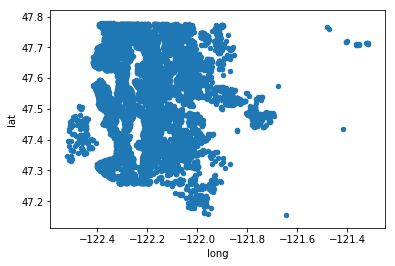

In [6]:
data.plot.scatter(x='long', y='lat');

In [7]:
data.drop('zipcode', axis=1, inplace=True)

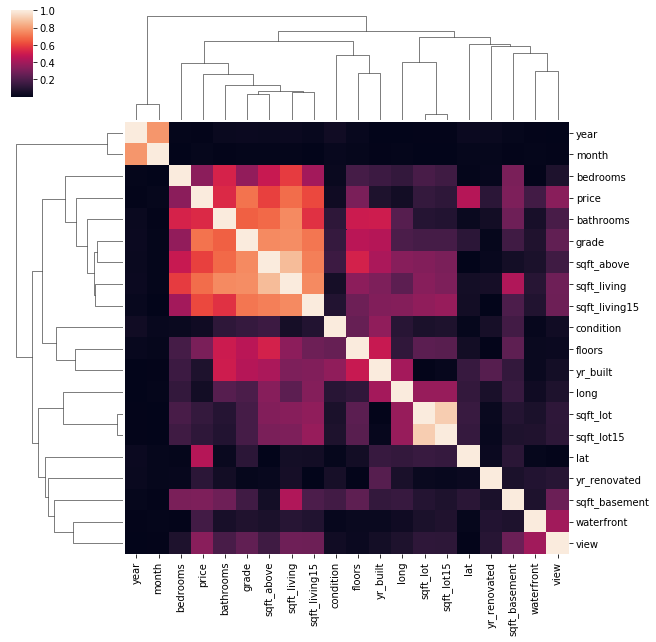

In [8]:
correlations = data.corr()
sns.clustermap(correlations.abs());

In [9]:
data_wo_price = data.loc[:, data.columns != 'price']

### Principal Component Analysis

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(data_wo_price)
scaled_data = scaler.transform(data_wo_price)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(21612, 19)

In [14]:
x_pca.shape

(21612, 2)

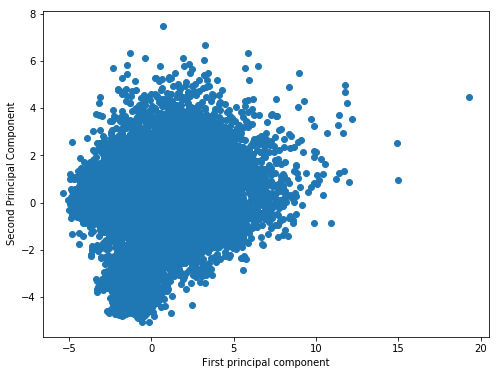

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component');

In [16]:
pca.components_

array([[  2.57688784e-01,   3.56237251e-01,   4.02256757e-01,
          1.75808802e-01,   2.10455298e-01,   5.36549747e-02,
          1.24236412e-01,  -7.44668142e-02,   3.65166070e-01,
          3.93716374e-01,   9.81088411e-02,   2.29990988e-01,
          7.81193481e-03,  -7.05370366e-05,   1.81207990e-01,
          3.63195581e-01,   1.72899824e-01,  -1.43377728e-02,
          5.79982015e-03],
       [  5.33238597e-02,  -1.39433147e-01,   6.09030643e-02,
          4.84891995e-01,  -4.38899137e-01,   1.20706577e-01,
          1.72234403e-01,   2.79238870e-01,  -9.61268489e-02,
         -6.41678278e-02,   2.46449522e-01,  -3.15193042e-01,
          8.03475115e-02,  -7.85002187e-02,   5.42959619e-02,
          7.33640094e-02,   4.79023933e-01,  -1.16960506e-02,
          7.28029263e-03]])

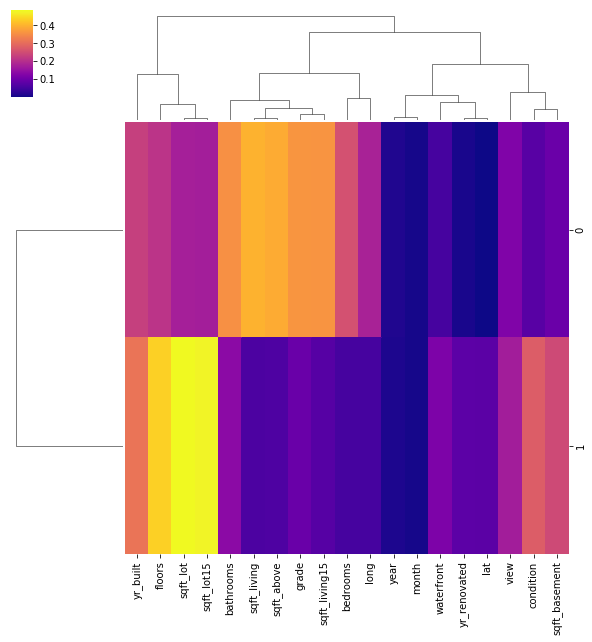

In [17]:
df_comp = pd.DataFrame(pca.components_, columns=data_wo_price.columns)
plt.figure(figsize=(12,6))
sns.clustermap(df_comp.abs(),cmap='plasma');

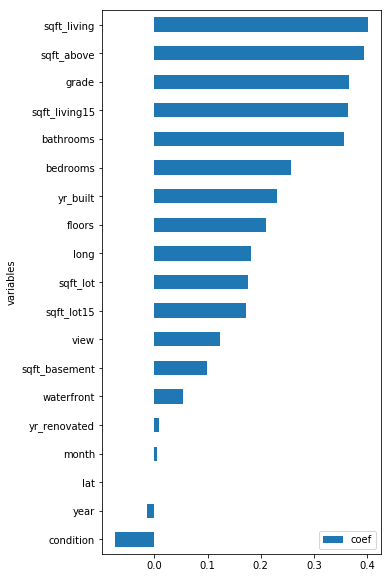

In [18]:
for_plot = pd.DataFrame({'coef' : list(pca.components_[0]), 'variables': list(data_wo_price.columns)})
fig = plt.figure(figsize=(5,10))

for_plot.sort_values(by='coef').plot.barh(x='variables', y='coef', ax = plt.gca())

#plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
#plt.title('Programming language usage')

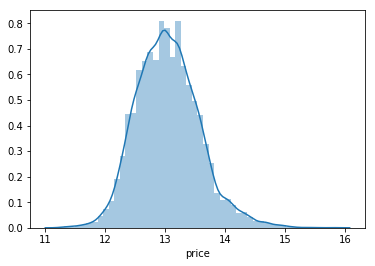

In [19]:
sns.distplot(data['price']);

## Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = data.loc[:, data.columns != 'price']
y = data['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Regression

In [51]:
import statsmodels.api as sm;

In [52]:
regmodel = sm.OLS(endog=y_train, exog=X_train)

In [53]:
results = regmodel.fit()
results

In [54]:
y_hat = results.predict(exog=X_test)

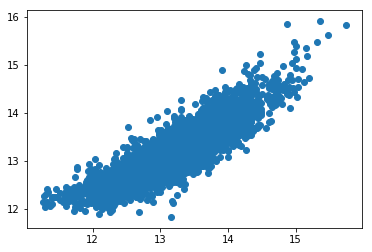

In [74]:
plt.scatter(x=y_test, y=y_hat);

## Linear Regression with Scikit Learn

In [76]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [77]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -1.24187583e-02   6.90158691e-02   9.96902246e-05   1.96822564e-02
   5.67979678e-02   3.93908900e-01   5.79678472e-02   7.15119790e-02
   1.58777645e-01   4.70916108e-05   5.25986137e-05  -3.23637517e-03
   7.82559758e-02   1.32623613e+00  -9.60488162e-03   1.09622324e-04
  -4.35861178e-02   5.84803259e-02   1.85337891e-03]
Mean squared error: 0.06
Variance score: 0.77


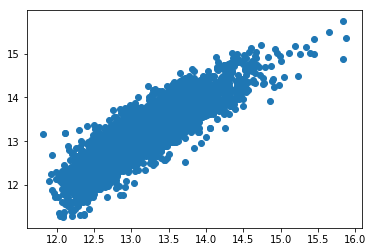

In [79]:
plt.scatter(y_pred, y_test);

## Ridge Regression

In [95]:
regr = linear_model.Ridge (alpha = .5)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

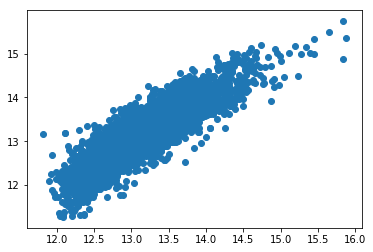

In [96]:
plt.scatter(y_pred, y_test);

In [97]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -1.24520130e-02   6.90233586e-02   9.97188302e-05   1.95761564e-02
   5.68447774e-02   3.91380790e-01   5.80295589e-02   7.14467309e-02
   1.58863508e-01   4.70556954e-05   5.26640460e-05  -3.24105426e-03
   7.81367002e-02   1.32319833e+00  -9.65730999e-03   1.09651738e-04
  -4.35507576e-02   5.84366699e-02   1.85069171e-03]
Mean squared error: 0.06
Variance score: 0.77


## Lasso Regression

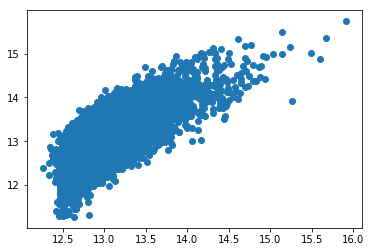

In [136]:
regr = linear_model.Lasso (alpha = .1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_pred, y_test);

In [137]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -0.00000000e+00   0.00000000e+00   3.01844796e-04  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.36532275e-02   0.00000000e+00   1.06942152e-05  -3.23542015e-03
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   1.83057110e-04
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00]
Mean squared error: 0.12
Variance score: 0.55


## Support Vector Machine

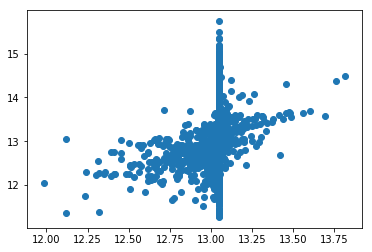

In [143]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
plt.scatter(y_pred, y_test);

In [146]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.27
Variance score: 0.02


## Fin!